# Model 1

## Random Forest 

This script demonstrates a typical machine learning pipeline for predicting the H1N1 and seasonal flu vaccine uptake using a Random Forest Classifier:

1. **Import Libraries**: The necessary libraries are imported, including pandas for data handling, scikit-learn for machine learning functionalities, and RandomForestClassifier for classification.

2. **Data Loading and Splitting**: The training features and labels are loaded into separate DataFrames (`train_features` and `train_labels`). The test features are also loaded (`test_features`). Then, the features are split into training and testing sets using the `train_test_split` function.

3. **Preprocessing Pipeline**: The preprocessing steps are defined within a `Pipeline`:
   - Numeric features undergo imputation for missing values using the median and scaling using `StandardScaler`.
   - Categorical features undergo imputation using the most frequent value and one-hot encoding using `OneHotEncoder`.
   - A `ColumnTransformer` combines these transformations for both numeric and categorical features.

4. **Model Definition and Training**:
   - A `RandomForestClassifier` is used as the classifier within a `Pipeline`.
   - The classifier is trained separately for predicting H1N1 vaccine uptake and seasonal vaccine uptake using the `fit` method.

5. **Prediction**:
   - The trained models are then used to make predictions on the test data for both H1N1 and seasonal vaccine uptake.

6. **Save Predictions**:
   - The predictions are saved to a CSV file (`predictions.csv`) along with respondent IDs for submission or further analysis.

This pipeline is commonly used in machine learning for healthcare applications, where features like demographics, health history, and behaviors are used to predict medical outcomes or behaviors such as vaccine uptake. Random Forest is a popular choice for classification tasks due to its robustness and ability to handle complex datasets. The preprocessing pipeline ensures that the data is appropriately transformed before being fed into the model, helping improve its performance.

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Split features and target variables
X_train = train_features.drop(columns=['respondent_id'])
y_train_h1n1 = train_labels['h1n1_vaccine']
y_train_seasonal = train_labels['seasonal_vaccine']
X_test = test_features.drop(columns=['respondent_id'])

# Preprocessing pipeline
numeric_features = X_train.select_dtypes(include=['int64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Append classifier to preprocessing pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier())])

# Train the model for H1N1 vaccine
clf.fit(X_train, y_train_h1n1)

# Make predictions for H1N1 vaccine
y_pred_h1n1 = clf.predict(X_test)

# Train the model for seasonal vaccine
clf.fit(X_train, y_train_seasonal)

# Make predictions for seasonal vaccine
y_pred_seasonal = clf.predict(X_test)

# Save the predictions
predictions_df = pd.DataFrame({'respondent_id': test_features['respondent_id'],
                               'h1n1_vaccine': y_pred_h1n1,
                               'seasonal_vaccine': y_pred_seasonal})
predictions_df.to_csv('predictions.csv', index=False)


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier
from sklearn.metrics import classification_report



# Split features and target variables
X_train = train_features.drop(columns=['respondent_id'])
y_train_h1n1 = train_labels['h1n1_vaccine']
y_train_seasonal = train_labels['seasonal_vaccine']
X_test = test_features.drop(columns=['respondent_id'])

# Preprocessing pipeline
numeric_features = X_train.select_dtypes(include=['int64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Append classifier to preprocessing pipeline
clf_h1n1 = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', XGBClassifier())])

clf_seasonal = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', XGBClassifier())])

# Train the model for H1N1 vaccine
clf_h1n1.fit(X_train, y_train_h1n1)

# Make predictions for H1N1 vaccine
y_pred_h1n1 = clf_h1n1.predict(X_test)

# Train the model for seasonal vaccine
clf_seasonal.fit(X_train, y_train_seasonal)

# Make predictions for seasonal vaccine
y_pred_seasonal = clf_seasonal.predict(X_test)

# Save the predictions
predictions_df = pd.DataFrame({'respondent_id': test_features['respondent_id'],
                               'h1n1_vaccine': y_pred_h1n1,
                               'seasonal_vaccine': y_pred_seasonal})
predictions_df.to_csv('predictions2.csv', index=False)


Metrics for H1N1 Vaccine:
              precision    recall  f1-score   support

           0       0.93      0.99      0.95     21033
           1       0.93      0.70      0.80      5674

    accuracy                           0.93     26707
   macro avg       0.93      0.84      0.88     26707
weighted avg       0.93      0.93      0.92     26707

Metrics for Seasonal Vaccine:
              precision    recall  f1-score   support

           0       0.93      0.88      0.91     14272
           1       0.87      0.92      0.90     12435

    accuracy                           0.90     26707
   macro avg       0.90      0.90      0.90     26707
weighted avg       0.90      0.90      0.90     26707



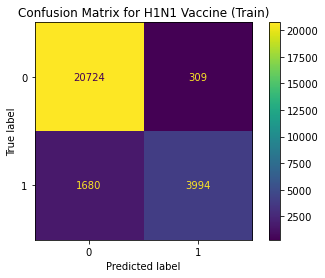

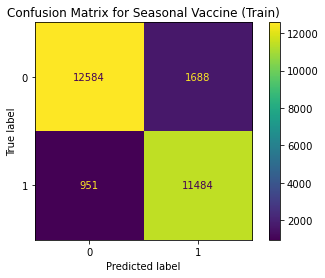

In [16]:

from sklearn.metrics import classification_report, plot_confusion_matrix
import matplotlib.pyplot as plt




# Calculate metrics for H1N1 vaccine
print("Metrics for H1N1 Vaccine:")
print(classification_report(y_train_h1n1, clf_h1n1.predict(X_train)))

# Calculate metrics for seasonal vaccine
print("Metrics for Seasonal Vaccine:")
print(classification_report(y_train_seasonal, clf_seasonal.predict(X_train)))

# Plot confusion matrix for H1N1 vaccine
plot_confusion_matrix(clf_h1n1, X_train, y_train_h1n1)
plt.title("Confusion Matrix for H1N1 Vaccine (Train)")
plt.show()

# Plot confusion matrix for seasonal vaccine
plot_confusion_matrix(clf_seasonal, X_train, y_train_seasonal)
plt.title("Confusion Matrix for Seasonal Vaccine (Train)")
plt.show()


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


# Split features and target variables
X_train = train_features.drop(columns=['respondent_id'])
y_train_h1n1 = train_labels['h1n1_vaccine']
y_train_seasonal = train_labels['seasonal_vaccine']
X_test = test_features.drop(columns=['respondent_id'])

# Preprocessing pipeline
numeric_features = X_train.select_dtypes(include=['int64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Append classifier to preprocessing pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier())])

# Train the model for H1N1 vaccine
clf.fit(X_train, y_train_h1n1)

# Predict probabilities for H1N1 vaccine
y_pred_proba_h1n1 = clf.predict_proba(X_test)[:, 1]  # Probability of class 1 (vaccine received)

# Train the model for seasonal vaccine
clf.fit(X_train, y_train_seasonal)

# Predict probabilities for seasonal vaccine
y_pred_proba_seasonal = clf.predict_proba(X_test)[:, 1]  # Probability of class 1 (vaccine received)

# Save the probabilities
predictions_df = pd.DataFrame({'respondent_id': test_features['respondent_id'],
                               'h1n1_vaccine': y_pred_proba_h1n1,
                               'seasonal_vaccine': y_pred_proba_seasonal})
predictions_df.to_csv('predictions3.csv', index=False)


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Split features and target variables
X_train = train_features.drop(columns=['respondent_id'])
y_train_h1n1 = train_labels['h1n1_vaccine']
y_train_seasonal = train_labels['seasonal_vaccine']
X_test = test_features.drop(columns=['respondent_id'])

# Preprocessing pipeline
numeric_features = X_train.select_dtypes(include=['int64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Append classifier to preprocessing pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier())])

# Train the model for H1N1 vaccine
clf.fit(X_train, y_train_h1n1)

# Predict probabilities for H1N1 vaccine
y_pred_proba_h1n1 = clf.predict_proba(X_test)[:, 1]  # Probability of class 1 (vaccine received)
y_pred_proba_h1n1_rounded = [round(prob, 1) for prob in y_pred_proba_h1n1]  # Round to 2 decimal places

# Train the model for seasonal vaccine
clf.fit(X_train, y_train_seasonal)

# Predict probabilities for seasonal vaccine
y_pred_proba_seasonal = clf.predict_proba(X_test)[:, 1]  # Probability of class 1 (vaccine received)
y_pred_proba_seasonal_rounded = [round(prob, 1) for prob in y_pred_proba_seasonal]  # Round to 1 decimal places

# Save the probabilities
predictions_df = pd.DataFrame({'respondent_id': test_features['respondent_id'],
                               'h1n1_vaccine': y_pred_proba_h1n1_rounded,
                               'seasonal_vaccine': y_pred_proba_seasonal_rounded})
predictions_df.to_csv('predictionsfinal.csv', index=False)


Evaluation metrics for H1N1 vaccine:
Accuracy: 0.57
Precision: 0.25
Recall: 0.50
F1-score: 0.33

Evaluation metrics for seasonal vaccine:
Accuracy: 0.62
Precision: 0.60
Recall: 0.56
F1-score: 0.58


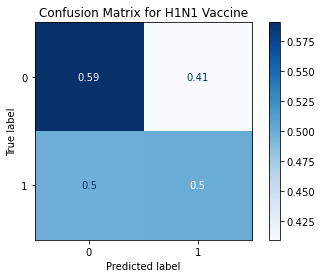

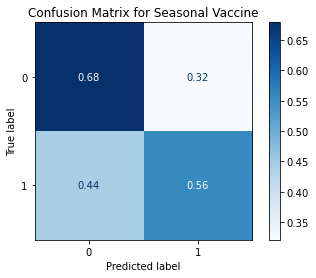

In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict classes for H1N1 vaccine
y_pred_h1n1 = clf.predict(X_val)

# Calculate accuracy, precision, recall, and F1-score for H1N1 vaccine
accuracy_h1n1 = accuracy_score(y_val_h1n1, y_pred_h1n1)
precision_h1n1 = precision_score(y_val_h1n1, y_pred_h1n1)
recall_h1n1 = recall_score(y_val_h1n1, y_pred_h1n1)
f1_h1n1 = f1_score(y_val_h1n1, y_pred_h1n1)

# Repeat the above steps for the seasonal vaccine
# Predict classes for seasonal vaccine
y_pred_seasonal = clf.predict(X_val)

# Calculate accuracy, precision, recall, and F1-score for seasonal vaccine
accuracy_seasonal = accuracy_score(y_val_seasonal, y_pred_seasonal)
precision_seasonal = precision_score(y_val_seasonal, y_pred_seasonal)
recall_seasonal = recall_score(y_val_seasonal, y_pred_seasonal)
f1_seasonal = f1_score(y_val_seasonal, y_pred_seasonal)

# Print the evaluation metrics
print("Evaluation metrics for H1N1 vaccine:")
print(f"Accuracy: {accuracy_h1n1:.2f}")
print(f"Precision: {precision_h1n1:.2f}")
print(f"Recall: {recall_h1n1:.2f}")
print(f"F1-score: {f1_h1n1:.2f}\n")

print("Evaluation metrics for seasonal vaccine:")
print(f"Accuracy: {accuracy_seasonal:.2f}")
print(f"Precision: {precision_seasonal:.2f}")
print(f"Recall: {recall_seasonal:.2f}")
print(f"F1-score: {f1_seasonal:.2f}")

from sklearn.metrics import plot_confusion_matrix

# Plot confusion matrix for H1N1 vaccine
plot_confusion_matrix(clf, X_val, y_val_h1n1, cmap=plt.cm.Blues, normalize='true')
plt.title('Confusion Matrix for H1N1 Vaccine')
plt.show()

# Plot confusion matrix for seasonal vaccine
plot_confusion_matrix(clf, X_val, y_val_seasonal, cmap=plt.cm.Blues, normalize='true')
plt.title('Confusion Matrix for Seasonal Vaccine')
plt.show()



In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load the datasets
train_features = pd.read_csv("training_set_features.csv")
train_labels = pd.read_csv("training_set_labels.csv")
test_features = pd.read_csv("test_set_features.csv")

# Split features and target variables
X_train = train_features.drop(columns=['respondent_id'])
y_train_h1n1 = train_labels['h1n1_vaccine']
y_train_seasonal = train_labels['seasonal_vaccine']

# Preprocessing pipeline
numeric_features = X_train.select_dtypes(include=['int64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Append classifier to preprocessing pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier())])

# Define parameter grid for grid search
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='f1', verbose=3)
grid_search.fit(X_train, y_train_h1n1)

# Get the best parameters and the best score
print("Best Parameters:", grid_search.best_params_)
print("Best F1-score:", grid_search.best_score_)

# Train the model with the best parameters
best_clf = grid_search.best_estimator_
best_clf.fit(X_train, y_train_h1n1)

# Make predictions
y_pred_h1n1 = best_clf.predict(test_features.drop(columns=['respondent_id']))

# Save the predictions
predictions_df = pd.DataFrame({'respondent_id': test_features['respondent_id'],
                               'h1n1_vaccine': y_pred_h1n1})
predictions_df.to_csv('predictions_h1n1.csv', index=False)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV 1/5] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100; total time=  21.1s
[CV 2/5] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100; total time=  18.2s
[CV 3/5] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100; total time=  18.6s
[CV 4/5] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100; total time=  18.1s
[CV 5/5] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100; total time=  18.4s
[CV 1/5] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=200; total time=  36.4s
[CV 2/5]

In [18]:
print("Shape of true labels for H1N1 vaccine:", y_true_h1n1.shape)
print("Shape of predicted probabilities for H1N1 vaccine:", y_pred_proba_h1n1.shape)
print("Shape of true labels for seasonal vaccine:", y_true_seasonal.shape)
print("Shape of predicted probabilities for seasonal vaccine:", y_pred_proba_seasonal.shape)


Shape of true labels for H1N1 vaccine: (26707,)
Shape of predicted probabilities for H1N1 vaccine: (26708,)
Shape of true labels for seasonal vaccine: (26707,)
Shape of predicted probabilities for seasonal vaccine: (26708,)


In [23]:
print(true_labels.columns)


Index(['26707', '2', '2.1', '0', '1', '0.1', '1.1', '1.2', '0.2', '1.3', '0.3',
       '0.4', '0.5', '0.6', '0.7', '1.4', '5', '1.5', '1.6', '5.1', '1.7',
       '1.8', '35 - 44 Years', 'College Graduate', 'Hispanic', 'Female',
       '> $75,000', 'Not Married', 'Rent', 'Employed', 'mlyzmhmf',
       'MSA, Not Principle  City', '1.9', '0.8', 'atmlpfrs', 'hfxkjkmi'],
      dtype='object')


In [26]:
print(predictions.columns)


Index(['26707', '0.1', '0.4'], dtype='object')
